In [1]:
PROGRAMA DE ANALISIS DE CAMARA DE DRONES

SyntaxError: invalid syntax (1567828809.py, line 1)

1. DRON MAVIC 3.0
Camara RBG de 20 MPix, tipo CMOS 3/4', tamaño 17 mm x 13 mm, arreglo de 3956 x 5280 pixeles o aprox 20 MPX 
Camara multiespectral de 5 MPix, tipo CMOS 1/2,8', 5,14 mm x 3.86 mm, arreglo de 2592 x 1994 pixeles o aprox 5 MPX
2. DRON PHANTOM
Camara RGB y Multiespectral 2MP, tipo CMOS 1/2,9', 4,98 mm x 3,74 mm, arreglo de 1600 x 1300 pixeles o aprox 2 MPX.
2. CAMARA MICASENSE para DRON MATRICE, tipo CMOS 1/3'que equivale a  4.8 mm x 3.6 mm, arreglo de 1028 x 960 pixeles o aprox 1.2 MPX, #FOV 47.2


In [ ]:
import numpy as np 
#import matplotlib 
import matplotlib.pyplot as plt

#PARAMETROS DE ENTRADA
#Parametros fijos
x_mm = np.array([17, 5.14, 4.98, 4.8]) #MAVIC RBG, MAVIC ME, PHATOM RGB Y ME, MICASENSE ME
y_mm = np.array([13, 3.86, 3.74, 3.6])
pixeles_x = np.array([5280, 2592, 1600, 1280])
pixeles_y = np.array([3956, 1994, 1300, 960])
#Parámetros variables
altura_vuelo = np.array([50, 50, 50, 50])
FOV = np.array([84, 73.91, 62.7, 58*2])
longitud_cuadrado= np.array([1, 1, 1, 1]) #longitud lateral de 1 m 


## CALCULOS PARAMETROS MAVIC RGB - TAMAÑO PIXEL Y NUMERO DE PIXELES
#calculo de Megapixeles de la RBG
MegaPixeles = np.multiply(pixeles_x, pixeles_y)*0.000001
#calculo tamaño de pixel
tamaño_x_micra= (x_mm/pixeles_x)*1000         #tamaño de pixel en micras en x aproximado
tamaño_y_micra= (y_mm/pixeles_y)*1000         #tamaño de pixel en micras en y aproximado

print(MegaPixeles)
print (tamaño_x_micra)
print(tamaño_y_micra)

#CALCULO DE CUBRIMIENTO
# calculemos con la altura de vuelo del dron en metros si el FOV en grados es de 84 el cubrimiento es:
n=2
x_lateral= altura_vuelo*np.tan(np.deg2rad(FOV/n))
area_cubierta=np.pi*(x_lateral)**2
tamaño_cubrimiento_pixel_cm_y=(x_lateral/pixeles_y)*100
tamaño_cubrimiento_pixel_cm_x=(x_lateral/pixeles_x)*100
area_por_pixel_rectangular= 2*tamaño_cubrimiento_pixel_cm_x*tamaño_cubrimiento_pixel_cm_y

print(x_lateral)
print(area_cubierta)  #m2
print(tamaño_cubrimiento_pixel_cm_x)
print(tamaño_cubrimiento_pixel_cm_y)
print(area_por_pixel_rectangular) #area en cm 2 cubierta por cada pixel en la camara



[20.88768   5.168448  2.08      1.2288  ]
[3.21969697 1.98302469 3.1125     3.75      ]
[3.28614762 1.93580742 2.87692308 3.75      ]
[45.02020221 37.61616983 30.46027162 80.01672645]
[ 6367.43844739  4445.27893797  2914.85809155 20114.60149373]
[0.85265534 1.45124112 1.90376698 6.25130675]
[1.13802331 1.8864679  2.34309782 8.33507567]
[  1.94068332   5.47543956   8.92142449 104.21022969]


COBERTURA EN 1M2

In [2]:
#COBERTURA EN 1 m2
#Con cuantos pixeles se cubre 1 m2 del cuadrado
x_cm_cobertura= (longitud_cuadrado/tamaño_cubrimiento_pixel_cm_x)*100
y_cm_cobertura = (longitud_cuadrado/tamaño_cubrimiento_pixel_cm_y)*100
area_1m_cobertura = x_cm_cobertura*y_cm_cobertura/2

#print(x_mm_cobertura)
#print(y_mm_cobertura)
print(area_1m_cobertura)  #pixeles en el area


[5152.82421501 1826.33739005 1120.89722968   95.9598691 ]


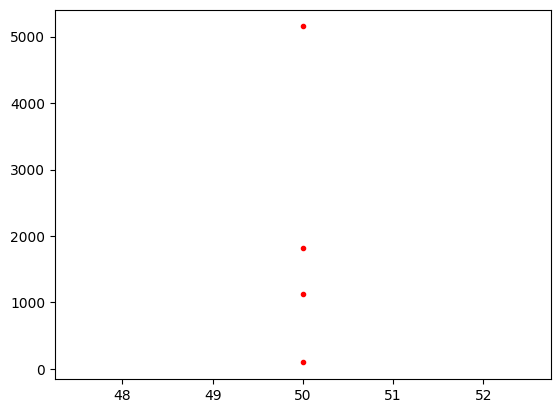

In [3]:

plt.plot(altura_vuelo, area_1m_cobertura, '.',color='red') 
plt.show()